# Attribute information


0. url: URL of the article (non-predictive)
1. timedelta: Days between the article publication and the dataset acquisition (non-predictive)
2. n_tokens_title: Number of words in the title
3. n_tokens_content: Number of words in the content
4. n_unique_tokens: Rate of unique words in the content
5. n_non_stop_words: Rate of non-stop words in the content
6. n_non_stop_unique_tokens: Rate of unique non-stop words in the content
7. num_hrefs: Number of links
8. num_self_hrefs: Number of links to other articles published by Mashable
9. num_imgs: Number of images
10. num_videos: Number of videos
11. average_token_length: Average length of the words in the content
12. num_keywords: Number of keywords in the metadata
13. data_channel_is_lifestyle: Is data channel 'Lifestyle'?
14. data_channel_is_entertainment: Is data channel 'Entertainment'?
15. data_channel_is_bus: Is data channel 'Business'?
16. data_channel_is_socmed: Is data channel 'Social Media'?
17. data_channel_is_tech: Is data channel 'Tech'?
18. data_channel_is_world: Is data channel 'World'?
19. kw_min_min: Worst keyword (min. shares)
20. kw_max_min: Worst keyword (max. shares)
21. kw_avg_min: Worst keyword (avg. shares)
22. kw_min_max: Best keyword (min. shares)
23. kw_max_max: Best keyword (max. shares)
24. kw_avg_max: Best keyword (avg. shares)
25. kw_min_avg: Avg. keyword (min. shares)
26. kw_max_avg: Avg. keyword (max. shares)
27. kw_avg_avg: Avg. keyword (avg. shares)
28. self_reference_min_shares: Min. shares of referenced articles in Mashable
29. self_reference_max_shares: Max. shares of referenced articles in Mashable
30. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable
31. weekday_is_monday: Was the article published on a Monday?
32. weekday_is_tuesday: Was the article published on a Tuesday?
33. weekday_is_wednesday: Was the article published on a Wednesday?
34. weekday_is_thursday: Was the article published on a Thursday?
35. weekday_is_friday: Was the article published on a Friday?
36. weekday_is_saturday: Was the article published on a Saturday?
37. weekday_is_sunday: Was the article published on a Sunday?
38. is_weekend: Was the article published on the weekend?
39. LDA_00: Closeness to LDA topic 0
40. LDA_01: Closeness to LDA topic 1
41. LDA_02: Closeness to LDA topic 2
42. LDA_03: Closeness to LDA topic 3
43. LDA_04: Closeness to LDA topic 4
44. global_subjectivity: Text subjectivity
45. global_sentiment_polarity: Text sentiment polarity
46. global_rate_positive_words: Rate of positive words in the content
47. global_rate_negative_words: Rate of negative words in the content
48. rate_positive_words: Rate of positive words among non-neutral tokens
49. rate_negative_words: Rate of negative words among non-neutral tokens
50. avg_positive_polarity: Avg. polarity of positive words
51. min_positive_polarity: Min. polarity of positive words
52. max_positive_polarity: Max. polarity of positive words
53. avg_negative_polarity: Avg. polarity of negative words
54. min_negative_polarity: Min. polarity of negative words
55. max_negative_polarity: Max. polarity of negative words
56. title_subjectivity: Title subjectivity
57. title_sentiment_polarity: Title polarity
58. abs_title_subjectivity: Absolute subjectivity level
59. abs_title_sentiment_polarity: Absolute polarity level
60. shares: Number of shares (target)

**List of the predictive attributes for the dataset, grouped.**

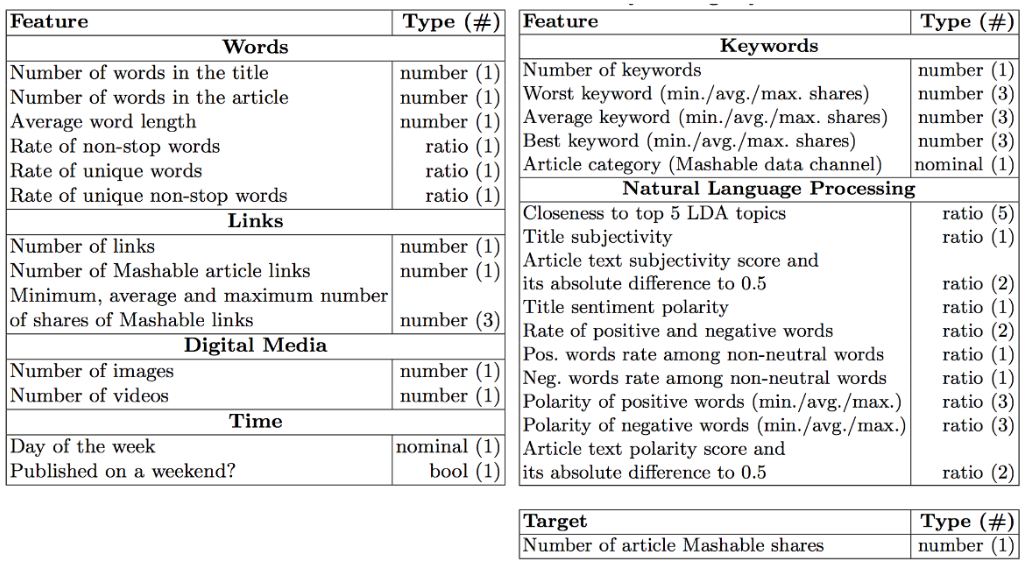

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sb

In [2]:
# from google.colab import files 
# uploaded = files.upload()
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip
!unzip OnlineNewsPopularity.zip

--2020-12-13 17:59:46--  https://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7476401 (7.1M) [application/x-httpd-php]
Saving to: ‘OnlineNewsPopularity.zip.2’

OnlineNewsPopularit 100%[===================>]   7.13M  12.3MB/s    in 0.6s    

2020-12-13 17:59:47 (12.3 MB/s) - ‘OnlineNewsPopularity.zip.2’ saved [7476401/7476401]

Archive:  OnlineNewsPopularity.zip
replace OnlineNewsPopularity/OnlineNewsPopularity.names? [y]es, [n]o, [A]ll, [N]one, [r]ename: 



# Preprocessing

In [3]:
df=pd.read_csv('OnlineNewsPopularity/OnlineNewsPopularity.csv')
df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,671.0,173.125,26900.0,843300.0,374962.500000,2514.742857,4004.342857,3031.115764,11400.0,48000.0,37033.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.025038,0.025001,0.151701,0.025000,0.773260,0.482679,0.141964,0.037572,0.014451,0.722222,0.277778,0.333791,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

Hence we see that there are no null values present in the dataset, but the presence of multiple rows and columns makes it hard to process. Also the fact that the data is already one hot-encoded makes it difficult to process for plot formation so that needs work as well.

In [5]:
df.nunique() # number of unique values per columns

url                              39644
 timedelta                         724
 n_tokens_title                     20
 n_tokens_content                 2406
 n_unique_tokens                 27281
                                 ...  
 title_subjectivity                673
 title_sentiment_polarity          813
 abs_title_subjectivity            532
 abs_title_sentiment_polarity      653
 shares                           1454
Length: 61, dtype: int64

In [6]:
# if n_tokens_content =0, that means there is no content for evaluation, so this is just noise
#So, removing the rows for which content tokens equal to 0
df  = df[df[' n_tokens_content'] != 0]
print ("After noise removal, the shape of the dataset is ",df.shape)

After noise removal, the shape of the dataset is  (38463, 61)


In [7]:
#changing the datatypes to int values
df.loc[:, ' data_channel_is_lifestyle']     = df[' data_channel_is_lifestyle'].astype(int);
df.loc[:, ' data_channel_is_entertainment'] = df[' data_channel_is_entertainment'].astype(int);
df.loc[:, ' data_channel_is_bus']           = df[' data_channel_is_bus'].astype(int);
df.loc[:, ' data_channel_is_socmed']        = df[' data_channel_is_socmed'].astype(int);
df.loc[:, ' data_channel_is_tech']          = df[' data_channel_is_tech'].astype(int);
df.loc[:, ' data_channel_is_world']         = df[' data_channel_is_world'].astype(int);

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38463 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             38463 non-null  object 
 1    timedelta                      38463 non-null  float64
 2    n_tokens_title                 38463 non-null  float64
 3    n_tokens_content               38463 non-null  float64
 4    n_unique_tokens                38463 non-null  float64
 5    n_non_stop_words               38463 non-null  float64
 6    n_non_stop_unique_tokens       38463 non-null  float64
 7    num_hrefs                      38463 non-null  float64
 8    num_self_hrefs                 38463 non-null  float64
 9    num_imgs                       38463 non-null  float64
 10   num_videos                     38463 non-null  float64
 11   average_token_length           38463 non-null  float64
 12   num_keywords                   

In [9]:
df.loc[:, 'channel']=np.where(df[' weekday_is_monday']==0.0,'','Monday')
df.loc[:, 'channel']=np.where(df[' weekday_is_tuesday']==1.0,'Tuesday',df['channel'])
df.loc[:, 'channel']=np.where(df[' weekday_is_wednesday']==1.0,'Wednesday',df['channel'])
df.loc[:, 'channel']=np.where(df[' weekday_is_thursday']==1.0,'Thursday',df['channel'])
df.loc[:, 'channel']=np.where(df[' weekday_is_friday']==1.0,'Friday',df['channel'])
df.loc[:, 'channel']=np.where(df[' weekday_is_saturday']==1.0,'Saturday',df['channel'])
df.loc[:, 'channel']=np.where(df[' weekday_is_sunday']==1.0,'Sunday',df['channel'])
df = df.rename(columns={"channel":"Day of the week"})
df

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Day of the week
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0,1,0,0,0,0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,Monday
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0,0,1,0,0,0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,Monday
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0,0,1,0,0,0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,Monday
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0,1,0,0,0,0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,Monday
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0,0,0,0,1,0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,8.0,0,0,0,0,1,0,-1.0,671.0,173.125,26900.0,843300.0,374962.500000,2514.742857,4004.342857,3031.115764,11400.0,48000.0,37033.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.025038,0.025001,0.151701,0.025000,0.773260,0.482679,0.141964,0.037572,0.014451,0.722222,0.277778,0.333791,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800,Wed

In [10]:
df['channel']=np.where(df[' data_channel_is_lifestyle']==1.0,'Lifestyle','Miscellaneous')
df['channel']=np.where(df[' data_channel_is_entertainment']==1.0,'Entertainment',df['channel'])
df['channel']=np.where(df[' data_channel_is_bus']==1.0,'Business',df['channel'])
df['channel']=np.where(df[' data_channel_is_socmed']==1.0,'Social Media',df['channel'])
df['channel']=np.where(df[' data_channel_is_tech']==1.0,'Technology',df['channel'])
df['channel']=np.where(df[' data_channel_is_world']==1.0,'World',df['channel'])
df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Day of the week,channel
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0,1,0,0,0,0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,Monday,Entertainment
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0,0,1,0,0,0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,Monday,Business
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0,0,1,0,0,0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,Monday,Business
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0,1,0,0,0,0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,Monday,Entertainment
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0,0,0,0,1,0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,Monday,Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,8.0,0,0,0,0,1,0,-1.0,671.0,173.125,26900.0,843300.0,374962.500000,2514.742857,4004.342857,3031.115764,11400.0,48000.0,37033.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.025038,0.025001,0.151701,0.025000,0.773260,0.482679,0.141964,0.037572,0.014451,0.722222,0.277778,0.333791,0.100000,0.75,-0

# Grouping of shares

In [11]:
# to create a classification based on number of shares, into low, avg and high
share_data= df[' shares']
share_label = list()
for share in share_data:
    if share <= 861:
        share_label.append('Low')
    elif share > 861 and share <= 31300:
        share_label.append('Average')
    elif share > 31300 and share <= 77200:
        share_label.append('High')
    else:
        share_label.append('Excellent!')

# Update this class label into the dataframe
df = pd.concat([df, pd.DataFrame(share_label, columns=['popularity'])], axis=1)
df.head(4)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Day of the week,channel,popularity
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.5,-0.1875,0.0,0.1875,593.0,Monday,Entertainment,Low
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.0,0.0000,0.5,0.0000,711.0,Monday,Business,Low
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.0,0.0000,0.5,0.0000,1500.0,Monday,Business,Average
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.0,0.0000,0.5,0.0000,1200.0,Monday,Entertainment,Average


Now, the data is reverse hot-encoded and can be used for further EDA.

# Shares vs. the day it is released and its channel

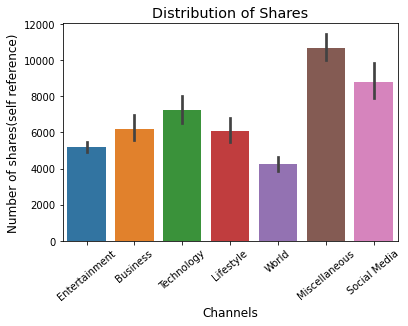

In [12]:
col = "channel"
sb.barplot(x=col, y=' self_reference_avg_sharess',data=df) 
plt.xlabel(col, fontsize= 'large')
plt.xticks(rotation=40)
plt.ylabel('Number of shares(self reference)', fontsize= 'large')
plt.xlabel('Channels', fontsize= 'large')
plt.title("Distribution of Shares",fontsize='x-large')
plt.savefig('Share_vs_Channel.eps')

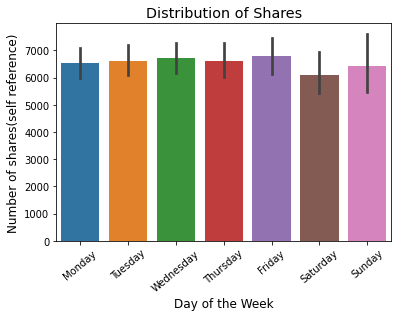

In [13]:
col = "Day of the week"
sb.barplot(x=col, y=' self_reference_avg_sharess',data=df) 
plt.xlabel(col, fontsize= 'large')
plt.xticks(rotation=40)
plt.ylabel('Number of shares(self reference)', fontsize= 'large')
plt.xlabel('Day of the Week', fontsize= 'large')
plt.title("Distribution of Shares",fontsize='x-large')
plt.savefig('Share_vs_Day.eps')

The above plots are in relation with the number of shares(self reference. now will proceed to plot the shares(last column/target variable) with day of the week.

In [14]:
dg= df.groupby('Day of the week').sum() #to get an idea of the data and to determine the order in which the age groups appear
print(dg[' shares'])

Day of the week
Friday       17906760.0
Monday       23226351.0
Saturday      9607003.0
Sunday        9850271.0
Thursday     22169163.0
Tuesday      22621189.0
Wednesday    23676490.0
Name:  shares, dtype: float64


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

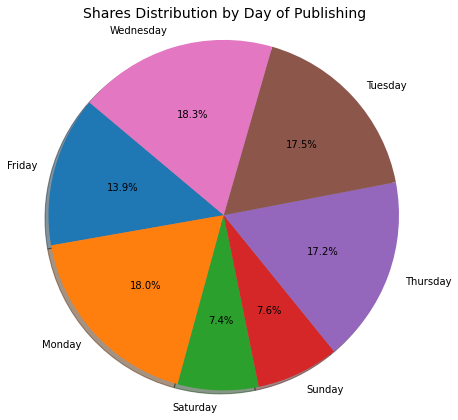

In [15]:
labels = 'Friday', 'Monday', 'Saturday','Sunday', 'Thursday','Tuesday','Wednesday'
sizes = dg[' shares']
f, ax = plt.subplots(figsize=(7, 7))
ax= plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title("Shares Distribution by Day of Publishing",fontsize=14)
plt.savefig('Share_vs_Day_pie.eps')

# Find no. of articles grouped by popularity

In [16]:
# Fetch the counts for each class
counts = df.groupby('popularity').size().reset_index()
counts.columns = ['Popularity','No of articles']
counts

,Popularity,No of articles
0,Average,30586
1,Excellent!,88
2,High,302
3,Low,7487


# Entropy calculation

In [17]:
import scipy.stats
import math 
# Finding the entropy
for col in df.columns.values:
  if ( col== "channel" or col== "Day of the week" ) :
      frequency=df.groupby([col])[' shares'].sum()
      N=frequency.sum()
      pro= frequency/N
      ent=-np.sum((frequency/N)*np.log(frequency/N))
      div= math.exp(ent)/N # this is just extra to measure diversity
      print (col),
      print (ent),
      print ("A measure of diversity is:(where 1 indicates perfectly diverse and 0 not diverse) -", div, '\n')

Day of the week
1.8913527621868516
A measure of diversity is:(where 1 indicates perfectly diverse and 0 not diverse) - 5.1359612523178324e-08 

channel
1.848341058975935
A measure of diversity is:(where 1 indicates perfectly diverse and 0 not diverse) - 4.919738205467392e-08 



# Statistical Analysis of the columns.

In [18]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000,38463.000000
mean,360.385747,10.382419,563.295375,0.565049,1.027065,0.710336,11.217872,3.394769,4.563061,1.263786,4.687892,7.215012,0.054000,0.178249,0.162104,0.060084,0.190443,0.212360,26.708187,1151.751079,313.946906,13182.545563,750317.505135,255215.159411,1102.009897,5603.782810,3103.427793,4121.536513,10646.369414,6598.260636,0.168240,0.186439,0.187323,0.183345,0.143983,0.061592,0.069079,0.130671,0.188134,0.141680,0.217177,0.214291,0.238692,0.456984,0.122973,0.040842,0.017122,0.703096,0.296774,0.364689,0.098376,0.779963,-0.267493,-0.537970,-0.110801,0.280573,0.070997,0.342431,0.154930,3355.360398
std,212.773031,2.113800,468.299538,3.573022,5.307978,3.312293,11.340580,3.869773,8.295365,4.164896,0.283231,1.916459,0.226021,0.382727,0.368551,0.237645,0.392655,0.408984,70.278215,3870.494630,624.449580,56850.480221,216395.888328,131821.240188,1127.031740,6096.725673,1301.238777,20026.792850,41612.149801,24553.836601,0.374084,0.389466,0.390176,0.386954,0.351077,0.240416,0.253592,0.337045,0.265547,0.220360,0.282238,0.288938,0.291382,0.088386,0.096091,0.016229,0.010588,0.150208,0.150032,0.085455,0.070382,0.212509,0.121174,0.279703,0.094919,0.323561,0.264338,0.188606,0.225636,11585.968776
min,8.000000,2.000000,18.000000,0.114964,1.000000,0.119134,0.000000,0.000000,0.000000,0.000000,3.600000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,174.000000,9.000000,259.000000,0.477419,1.000000,0.632588,5.000000,1.000000,1.000000,0.000000,4.496250,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,143.000000,0.000000,843300.000000,171300.000000,0.000000,3549.290325,2373.807082,703.000000,1200.000000,1100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025060,0.025012,0.028572,0.025622,0

# Histogram of the tokens used in the content across various webpages

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


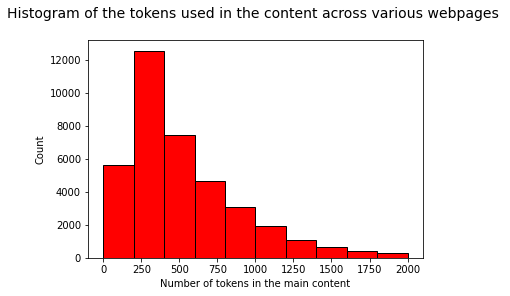

In [19]:
  plt.hist((df[" n_tokens_content"]),histtype='bar',range=[0, 2000], color="red", edgecolor='black')
  plt.xlabel("Number of tokens in the main content") 
  # show plot
  plt.title("Histogram of the tokens used in the content across various webpages \n",fontsize=14) 
  plt.ylabel('Count')
  plt.savefig('No_tokens_hist.eps')

Hence, we can see the mode is between 200 to 300 words in content of news articles.

# statistical analysis of the tokens
1. In title
2. In Content

In [20]:
from scipy.stats import skew
for col in df.columns.values:
  if (col==" n_tokens_title" or col==" n_tokens_content"):
   min=df[col].quantile([0.])
   max=df[col].quantile([1.])
   median=df[col].quantile([0.5])
   mean = df[col].mean()
   vari=np.var(df[col])
   print("This is the mean for ",col," : ",mean)
   print(" ")
   print("This is the variance for ",col," : ",vari)
   print(" ")
   print("This is the minimum value for ",col," : ",min[0])
   print(" ")
   print("This is the maximum value for ",col," : ",max[1])
   print(" ")
   print("This is the median value for ",col," : ",median[0.5])
   print( '\n25th percentile for ',col,' : ', (df[col].quantile([0.25]))[0.25])
   print( '\n75th percentile for ',col,' : ', (df[col].quantile([0.75]))[0.75])
   iqr= (df[col].quantile([0.75]))[0.75]-(df[col].quantile([0.25]))[0.25]
   print("\nInter Quartile Range for ",col," : ",iqr)
   print( '\nSkewness for ',col,' : ', skew(df[col])) 
   print("------------------------------------------------------")


This is the mean for   n_tokens_title  :  10.382419468060213
 
This is the variance for   n_tokens_title  :  4.468034007860442
 
This is the minimum value for   n_tokens_title  :  2.0
 
This is the maximum value for   n_tokens_title  :  23.0
 
This is the median value for   n_tokens_title  :  10.0

25th percentile for   n_tokens_title  :  9.0

75th percentile for   n_tokens_title  :  12.0

Inter Quartile Range for   n_tokens_title  :  3.0

Skewness for   n_tokens_title  :  nan
------------------------------------------------------
This is the mean for   n_tokens_content  :  563.2953747757585
 
This is the variance for   n_tokens_content  :  219298.75561571203
 
This is the minimum value for   n_tokens_content  :  18.0
 
This is the maximum value for   n_tokens_content  :  8474.0
 
This is the median value for   n_tokens_content  :  423.0

25th percentile for   n_tokens_content  :  259.0

75th percentile for   n_tokens_content  :  729.0

Inter Quartile Range for   n_tokens_content  :  4

# Shares vs data channel

this isn't really that helpful other than showing that the data is skewed

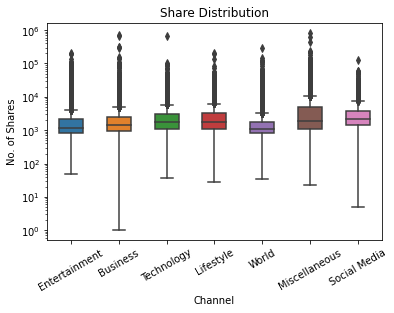

In [21]:
fig, ax = plt.subplots()
sb.boxplot(x ='channel', y =' shares', data = df,width=0.5) 
ax.set(yscale="log")
plt.ylabel('No. of Shares')
plt.title('Share Distribution')
plt.xlabel('Channel')
plt.xticks(rotation=30) 
plt.savefig('Share_vs_Channel_Box.eps')

# Day of the week vs shares

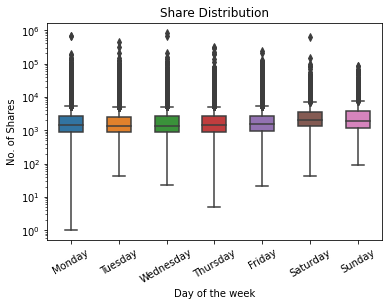

In [22]:
fig, ax = plt.subplots()
sb.boxplot(x ='Day of the week', y =' shares', data = df,width=0.5) 
ax.set(yscale="log")
plt.ylabel('No. of Shares')
plt.title('Share Distribution')
plt.xticks(rotation=30) 
plt.savefig('Share_vs_Day_Box.eps')

List:

negative vs positive content

title subjectivity vs shares

number of images/videos with each

# polarity vs channel vs weekend/weekday

In [23]:
df2=df.drop([' timedelta',' data_channel_is_lifestyle',' data_channel_is_entertainment',' data_channel_is_bus',' data_channel_is_socmed',' data_channel_is_tech',' data_channel_is_world',
             ' kw_min_min',' kw_max_min',' kw_avg_min',' kw_min_max',' kw_max_max',' weekday_is_monday',' weekday_is_tuesday',' weekday_is_wednesday',' weekday_is_thursday',
             ' weekday_is_friday',' weekday_is_saturday',' weekday_is_sunday',' LDA_00',' LDA_01',' LDA_02',' LDA_03',' LDA_04'],axis=1)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


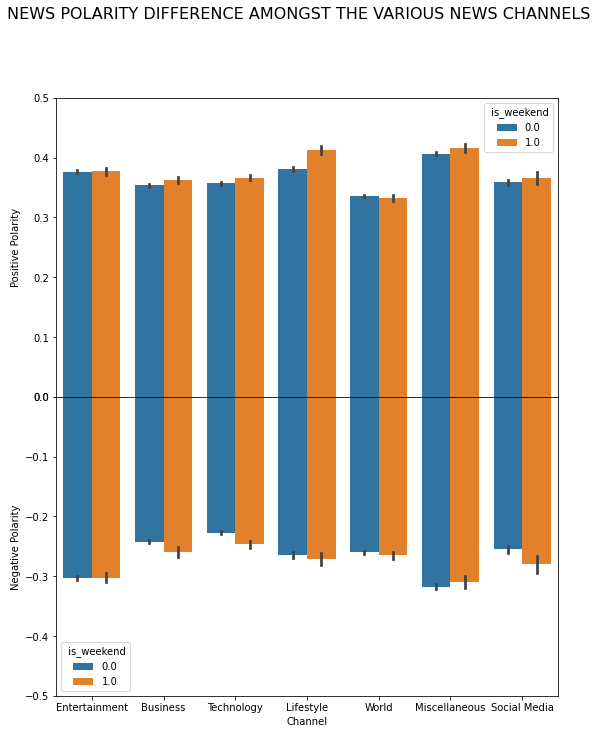

In [24]:

fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(9,11), squeeze=False)


ax[0][0].set(ylim=(0, 0.5))
sb.barplot(x='channel', y=' avg_positive_polarity',hue=' is_weekend',data=df2,ax=ax[0][0] )
ax[0][0].set_ylabel('Positive Polarity')
#ax.set_axis_labels("Channels", "Positive polarity")   
#plt.title('STARKING DIFFERENCE BETWEEN THE MALE AND FEMALE SUICIDE RATES OVER THE WORLD');

ax[1][0].set(ylim=(0,-0.5))
sb.barplot(x='channel', y=' avg_negative_polarity',hue=' is_weekend',data=df2, ax=ax[1][0] ).invert_yaxis()
plt.subplots_adjust(hspace=0)
plt.ylabel('Negative Polarity')
fig.suptitle('NEWS POLARITY DIFFERENCE AMONGST THE VARIOUS NEWS CHANNELS', fontsize=16, va='baseline')
fig.align_ylabels()
plt.xlabel('Channel')
plt.savefig('Polarity_vs_Channel.eps')

# Heatmap of the continuous variables of the dataset

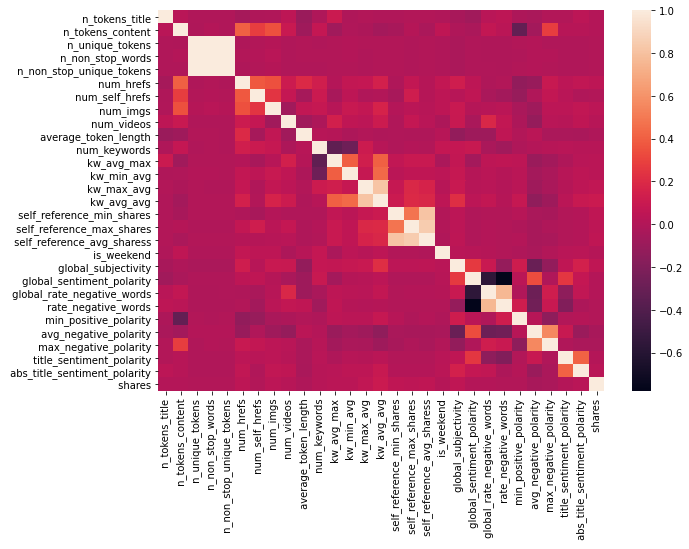

In [25]:
df3=df2.drop([' global_rate_positive_words',' rate_positive_words',' avg_positive_polarity',' max_positive_polarity',' min_negative_polarity'
              ,' title_subjectivity',' abs_title_subjectivity'],axis=1)


import seaborn as sns

# Create the correlation matrix
corr = df3.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr,annot=False)
plt.savefig('Heatmap.eps')
   

# Can also save this as a png with
# f.savefig('heatmap_colored_correlation_matrix_seaborn_python.png')

# log likelihood



Have taken the log likelihood of number of images (and vids).

In [27]:
import math
import statsmodels.api as sm

n=len(df)
x_bar=df[' num_imgs'].mean()
summ=df[' num_imgs'].sum()
x=x_bar
sigma=math.sqrt(((df[' num_imgs']-x)*(df[' num_imgs']-x)).mean())
  
logL = -summ/(2*sigma*sigma) - n*np.log(2*math.pi)/2 -n*np.log(sigma)
print(" The log likelihood of the number of images is \n",logL)


x_bar=df[' num_videos'].mean()
x=x_bar
summ= df[' num_videos'].sum()
sigma=math.sqrt(((df[' num_videos']-x)*(df[' num_videos']-x)).mean())
  
logL = -summ/(2*sigma*sigma) - n*np.log(2*math.pi)/2 -n*np.log(sigma)
print(" The log likelihood of the number of videos is \n",logL)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


 The log likelihood of the number of images is 
 -121197.50313609616
 The log likelihood of the number of videos is 
 -94095.25189823547
